# Predicting Employee Attrition in the Dawn of Recession

In [35]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
#store data into a data frame
df = pd.read_csv('train.csv')
#Print the first 7 rows of data
df.head(7)

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1
5,6,31,0,Travel_Rarely,Sales,7,4,Life Sciences,941,2,...,3,0,13,2,7,7,5,2,2,1
6,7,32,1,Travel_Rarely,Research & Development,1,3,Life Sciences,331,4,...,3,0,4,2,3,2,1,2,1,1


In [37]:
y = df.pop("Attrition")
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [38]:
numeric_variables = list(df.dtypes[df.dtypes != 'object'].index)
df[numeric_variables].head()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,2,3,571,3,3,4,2564,0,...,3,0,12,2,11,7,6,7,4,1
1,2,36,12,4,1614,3,3,3,4663,9,...,3,2,7,2,3,2,1,1,2,1
2,3,55,2,1,842,3,3,4,5160,4,...,3,0,12,3,9,7,7,3,5,1
3,4,39,24,1,2014,1,3,4,4108,7,...,3,0,18,2,7,7,1,7,4,1
4,5,37,3,3,689,3,3,3,9434,1,...,3,1,10,2,10,7,7,8,1,1


In [39]:
df['Age'].fillna(df.Age.mean(), inplace = True)

In [40]:
df.tail()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
1623,1624,42,Travel_Frequently,Research & Development,19,3,Medical,752,3,Male,...,3,0,7,2,2,2,2,2,3,1
1624,1625,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
1625,1626,25,Travel_Rarely,Sales,9,2,Life Sciences,1439,1,Male,...,3,0,6,2,3,2,2,2,5,1
1626,1627,29,Travel_Rarely,Human Resources,13,3,Human Resources,1844,1,Male,...,3,3,4,3,2,2,2,0,5,1
1627,1628,29,Travel_Rarely,Research & Development,18,1,Medical,315,3,Male,...,3,0,4,3,4,3,0,1,2,1


In [41]:
df[numeric_variables].head()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,2,3,571,3,3,4,2564,0,...,3,0,12,2,11,7,6,7,4,1
1,2,36,12,4,1614,3,3,3,4663,9,...,3,2,7,2,3,2,1,1,2,1
2,3,55,2,1,842,3,3,4,5160,4,...,3,0,12,3,9,7,7,3,5,1
3,4,39,24,1,2014,1,3,4,4108,7,...,3,0,18,2,7,7,1,7,4,1
4,5,37,3,3,689,3,3,3,9434,1,...,3,1,10,2,10,7,7,8,1,1


In [42]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(df[numeric_variables],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
print("Train accuracy : :", accuracy_score(y,model.predict(df[numeric_variables])))

Train accuracy : : 1.0


In [44]:
test = pd.read_csv("test.csv")

In [45]:
test[numeric_variables].head()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,9,3,377,4,3,4,2070,1,...,4,1,5,3,5,2,0,4,5,1
1,2,31,6,4,653,1,4,4,5460,4,...,4,2,13,4,7,7,5,7,3,1
2,3,37,6,3,474,3,4,1,5974,4,...,3,2,13,2,7,7,6,7,4,1
3,4,42,1,2,827,4,2,4,6062,9,...,3,1,8,4,4,3,0,2,5,1
4,5,45,4,2,972,3,3,2,4447,1,...,3,0,9,5,9,7,0,8,2,1


In [56]:
test['Age'].fillna(test.Age.mean(), inplace = True)

In [57]:
test = test[numeric_variables].fillna(test.mean()).copy()

In [59]:
y_pred = model.predict_proba(test[numeric_variables])[:,1]

In [60]:
submission = pd.DataFrame({
            "Id": test["Id"],
            "Attrition": y_pred
        })
submission.to_csv('SummerAnalytics2020.csv', index = False)

In [54]:
submission.head()

,Id,Attrition
0,1,0.24
1,2,0.19
2,3,0.12
3,4,0.16
4,5,0.16


In [61]:
print("Test accuracy : :", accuracy_score(y,y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1628, 470]

In [209]:
#m_test.head(7)

In [210]:
#m_test.dtypes

In [211]:
#Get the numbers of rows and Columns
df.shape

(470, 28)

In [212]:
#m_test.shape

In [213]:
#Get the column data types
df.dtypes

Id                          int64
Age                         int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [214]:
#Get a count of the empty values for each column
df.isna().sum()

Id                         0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [215]:
#m_test.isna().sum()

In [216]:
#Check for any missing / null values in the data
df.isnull().values.any()

False

In [217]:
#m_test.isnull().values.any()

In [218]:
#View some statistics
df.describe()

,Id,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,...,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.0
mean,235.500000,37.010638,9.293617,2.914894,1033.929787,2.708511,2.736170,2.693617,6584.874468,2.670213,...,3.155319,0.800000,11.387234,2.710638,7.070213,4.238298,2.263830,4.261702,3.051064,1.0
std,135.821574,9.166425,8.084506,1.016491,593.994868,1.089850,0.729057,1.138473,4758.485182,2.516421,...,0.362595,0.855435,7.817961,1.261744,5.900505,3.462042,3.272058,3.501693,1.413289,0.0
min,1.000000,18.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1091.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
25%,118.250000,31.000000,2.000000,2.000000,491.500000,2.000000,2.000000,2.000000,2964.750000,1.000000,...,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000,1.0
50%,235.500000,35.000000,7.000000,3.000000,1042.000000,3.000000,3.000000,3.000000,5038.000000,1.000000,...,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000,1.0
75%,352.750000,43.000000,15.000000,4.000000,1537.750000,4.000000,3.000000,4.000000,8362.250000,4.000000,...,3.000000,1.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000,4.000000,1.0
max,470.000000,60.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,4.000000,19943.000000,9.000000,...,4.000000,3.000000,40.000000,6.000000,40.000000,17.000000,15.000000,17.000000,5.000000,1.0


In [219]:
#m_test.describe()

In [220]:
#Get a count of the number of employees that stayed and left the company
#df['Attrition'].value_counts()

In [221]:
#Visualize the number of employees that stayed and left the company
#sns.countplot(df['Attrition'])

In [222]:
#This is the percentage if we just guessed no for attrition
#(843 - 785)/843

In [223]:
#Show the number of employees that left and stayed by age
#import matplotlib.pyplot as plt
#plt.subplots(figsize = (12,4))
#sns.countplot(x='Age', hue='Attrition', data=df, palette = 'colorblind')

In [224]:
#Print all of the data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : '+ str(df[column].unique()))
        print(df[column].value_counts())
        print('___________________________________________________________')

BusinessTravel : ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Travel_Rarely        334
Travel_Frequently     78
Non-Travel            58
Name: BusinessTravel, dtype: int64
___________________________________________________________
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    314
Sales                     138
Human Resources            18
Name: Department, dtype: int64
___________________________________________________________
EducationField : ['Medical' 'Life Sciences' 'Human Resources' 'Technical Degree'
 'Marketing' 'Other']
Life Sciences       203
Medical             131
Marketing            54
Technical Degree     50
Other                25
Human Resources       7
Name: EducationField, dtype: int64
___________________________________________________________
Gender : ['Male' 'Female']
Male      278
Female    192
Name: Gender, dtype: int64
___________________________________________________________
JobRole : ['Research Scientist'

In [225]:
#Remove some useless columns
df = df.drop('EmployeeNumber', axis = 1)
df = df.drop('Behaviour', axis = 1)

In [226]:
#Get the correlation
df.corr()

,Id,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
Id,1.000000,-0.015695,0.063328,0.019506,-0.080095,-0.052992,0.007419,-0.007782,-0.044171,-0.034300,-0.040676,0.024077,-0.029443,0.010936,-0.016004,-0.048900,0.035503,-0.034096,0.013740
Age,-0.015695,1.000000,-0.053300,0.182022,0.045132,0.014778,-0.026861,0.499099,0.292252,-0.055140,-0.019744,0.024473,0.685664,-0.007476,0.305979,0.210959,0.225758,0.202783,-0.005803
DistanceFromHome,0.063328,-0.053300,1.000000,0.015501,0.023528,-0.020834,0.126551,-0.060506,-0.040192,-0.021289,0.001866,0.031324,-0.047817,-0.058960,0.055618,0.036956,0.029468,0.014377,-0.006354
Education,0.019506,0.182022,0.015501,1.000000,0.012203,0.027180,0.025324,0.095244,0.113205,-0.007964,0.001231,0.036781,0.134016,0.012345,0.036193,0.102717,0.084975,0.063178,0.014905
EnvironmentSatisfaction,-0.080095,0.045132,0.023528,0.012203,1.000000,0.045231,-0.015422,0.016314,0.023961,0.006561,-0.009287,0.005946,0.021033,-0.050614,0.039330,0.062527,0.086784,0.023942,0.012453
JobInvolvement,-0.052992,0.014778,-0.020834,0.027180,0.045231,1.000000,-0.074475,-0.009591,-0.014985,0.042279,0.058554,0.045129,-0.008598,0.000276,-0.030380,0.004688,-0.063715,0.009564,0.019311
JobSatisfaction,0.007419,-0.026861,0.126551,0.025324,-0.015422,-0.074475,1.000000,-0.007933,-0.114235,0.094919,0.063872,0.002627,-0.034314,-0.026225,0.055264,0.036415,-0.016031,0.012668,0.024321
MonthlyIncome,-0.007782,0.499099,-0.060506,0.095244,0.016314,-0.009591,-0.007933,1.000000,0.135765,-0.135338,-0.085212,0.059193,0.793414,0.011583,0.518279,0.349249,0.364332,0.323363,-0.053942
NumCompaniesWorked,-0.044171,0.292252,-0.040192,0.113205,0.023961,-0.014985,-0.114235,0.135765,1.000000,-0.073978,-0.037215,0.072307,0.250252,-0.003929,-0.135288,-0.107948,-0.034209,-0.109961,-0.031826
PercentSalaryHike,-0.034300,-0.055140,-0.021289,-0.007964,0.006561,0.042279,0.094919,-0.135338,-0.073978,1.000000,0.766543,-0.051892,-0.119540,0.000117,-0.149965,-0.118841,-0.109495,-0.116942,-0.006353


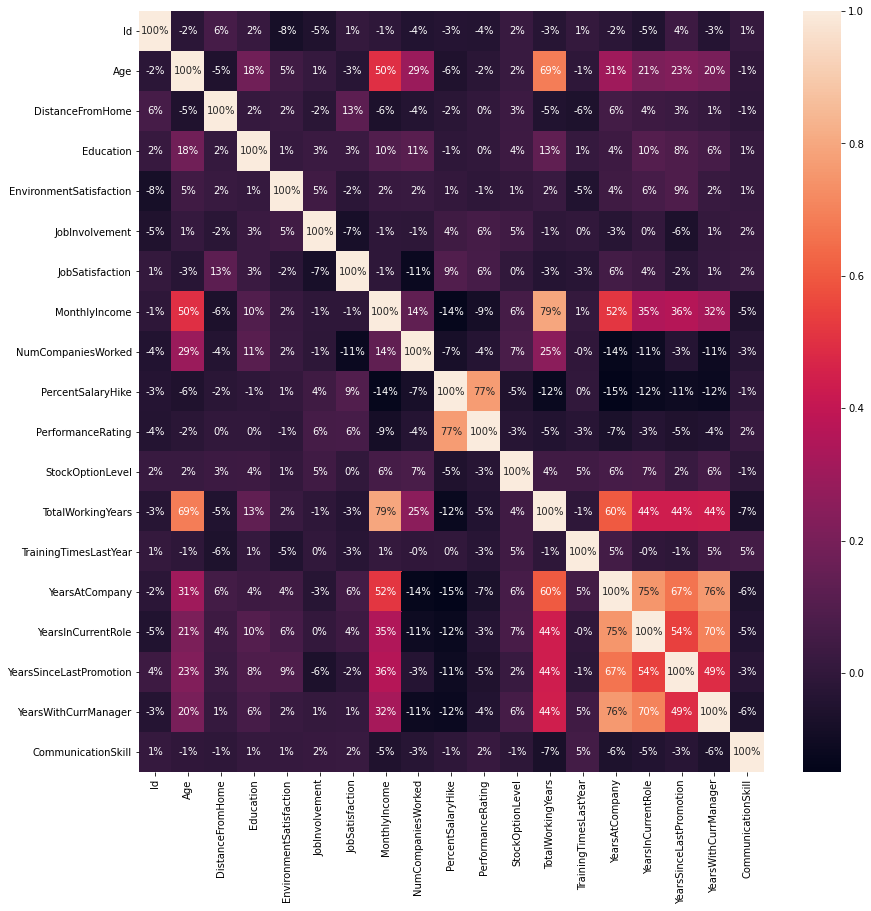

In [227]:
#Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt= '.0%')

In [228]:
#Transform the data
#Transform non-numerical into numerical col
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [230]:
#Create a new column
df['Age_Years'] = df['Age']

In [231]:
#Drop the age column
df = df.drop('Age', axis = 1)

In [232]:
#Show the dataframe
df

,Id,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Age_Years
0,0,2,1,8,2,3,3,1,2,6,...,1,1,5,3,5,2,0,4,4,10
1,1,2,2,5,3,3,0,1,3,7,...,1,2,13,4,7,7,5,7,2,13
2,2,2,1,5,2,3,2,1,3,6,...,0,2,13,2,7,7,6,7,3,19
3,3,2,1,0,1,1,3,0,1,4,...,0,1,8,4,4,3,0,2,4,24
4,4,0,1,3,1,1,2,1,2,2,...,0,0,9,5,9,7,0,8,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,465,2,1,1,3,1,3,1,2,2,...,0,0,1,2,1,0,0,0,4,14
466,466,1,2,2,1,3,1,0,2,8,...,0,0,0,2,0,0,0,0,1,0
467,467,2,1,22,2,3,1,1,3,6,...,0,2,6,3,6,5,1,4,0,6
468,468,2,1,22,2,3,1,1,1,0,...,1,1,10,2,9,0,7,8,2,13


In [190]:
#Split the data
#X = df.iloc[:, 1:df.shape[1]].values
#Y = df.iloc[:, 0].values

In [233]:
target = m_train['Attrition'] #test.csv
features = m_train.drop('Attrition', axis = 1) #train.csv

In [234]:
#Split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(target,features, test_size = 0.4, random_state = 0)

In [235]:
#Use the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [236]:
#predict the results for test
test_pred = forest.predict(m_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [161]:
#Get the accuracy on the training data set
#forest.score(X_train, Y_train)

In [41]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.
#from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(Y_test, forest.predict_proba(X_test))
  
#TN = cm[0][0]
#TP = cm[1][1]
#FN = cm[1][0]
#FP = cm[0][1]
  
#print(cm)
#print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
#print()# Print a new line

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [26]:
# Return the feature importances (the higher, the more important the feature).
#importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
#importances = importances.sort_values('importance',ascending=False).set_index('feature')
#importances

,importance
feature,
MonthlyIncome,0.143
Age_Years,0.086
TotalWorkingYears,0.075
DistanceFromHome,0.069
YearsAtCompany,0.052
YearsWithCurrManager,0.050
TrainingTimesLastYear,0.050
PercentSalaryHike,0.049
JobRole,0.046


In [36]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np

X, y1 = make_classification(n_samples=5, n_features=5, n_informative=2, n_classes=2, random_state=1)
y2 = shuffle(y1, random_state=1)
Y = np.vstack((y1, y2)).T

forest = RandomForestClassifier(n_estimators=10, random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(X, Y)
multi_target_forest.predict_proba(X)
predict_proba(X)

print(multi_target_forest.predict_proba(X))

[array([[0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.9, 0.1],
       [0.4, 0.6]]), array([[0.6, 0.4],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.9, 0.1],
       [0.9, 0.1]])]
